# Project 1: SAT & ACT Analysis

## Problem Statement

#### Why is there a negative correlation between participation and performance?

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

### Import Dependencies

In [1033]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

%matplotlib inline
%config IFCompleter.greedy=True

sns.set_style('darkgrid')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [1034]:
# read SAT and ACT data
sat_17 = pd.read_csv('../data/sat_2017.csv')
act_17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [1035]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [1036]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [1037]:
# to convert to proportion
type(sat_17['Participation'][0])

str

In [1038]:
act_17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [1039]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [1040]:
# to convert both to float type
type(act_17['Participation'][0]), type(act_17['Composite'][0])

(str, str)

#### 3. Verbally Describe Data

**Data Observations:**   
`sat_2017`:
- total 5 columns
- convert ['Participation'] to type *float* (proportion)
- shorten col_name of['Evidence-Based Reading and Writing'] to 'ERW'

`act_2017`:
- total 7 columns
- convert ['Participation'] to type *float* (as a proportion)
- convert ['Composite'] to type *float* 
- correct State, Wyonming ['Composite'] score

In [1041]:
# create custom hist function for quick EDA later
def eda_hist(series, min_score = 0, max_score = 800, bins_pref = 30):
    plt.hist(series, bins= bins_pref, range=[min_score, max_score])
    plt.ylabel('Frequency')
    plt.xlabel('Scores')
    plt.axvline(series.median(), c='red')
    
    print('Variance: {} \nStd.Deviation: {}\nMax Score: {}\nMin Score: {}'.format(np.var(series), np.std(series), np.max(series), np.min(series)))

#### 4a. Does the data look complete? 

*Answer:*   
Yes the dataset looks complete for the 2017 data as there all rows are non-null values. 

#### 4b. Are there any obvious issues with the observations?

- What is the minimum **possible** value for each test/subtest?   
-> SAT Test min. = 400  
-> SAT Subtest min. = 200  
-> ACT Test/Subtest min. = 1  

- What is the maximum **possible** value?  
-> SAT Test min. = 1600  
-> SAT Subtest min. = 800  
-> ACT Test/Subtest min. = 36

|SAT 2017 |*(for the dataset)*| | ACT 2017|*(for the dataset)*|| | |SAT 2017 |*(possible)*| | |ACT 2017|*(possible)*| | | | | |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
||**Max**|**Min**||**Max**|**Min**||||**Max**|**Min**||**Max**|**Min**|
|**EBRW**|644|482|**English**|25.5|16.3|||**EBRW**|800|200|**English**|36|1| |
|**Math**|651|52|**Math**|25.3|18|||**Math**|800|200|**Math**|36|1| |
|**Total**|1295|950|**Reading**|26|18|||**Total**|1600|400|**Reading**|36|1| |
||||**Science**|24.9|2.3||||||**Science**|36|1| |
||||**Composite**|25.5|17.8||||||**Composite**|36|1 | |

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

*Reference:*
- [Min/max SAT Scores](https://www.princetonreview.com/college/sat-act)
- [Min/max ACT Scores](https://www.studypoint.com/ed/act-scoring/)


In [1042]:
# quick overview of SAT 2017 scores
sat_17.iloc[:,2:].agg([np.var, np.std, np.mean, np.median, np.max, np.min])

,Evidence-Based Reading and Writing,Math,Total
var,2085.465882,7209.558431,8555.290196
std,45.666901,84.909119,92.494812
mean,569.117647,547.627451,1126.098039
median,559.000000,548.000000,1107.000000
amax,644.000000,651.000000,1295.000000
amin,482.000000,52.000000,950.000000


##### Explore SAT 2017 Scores

Variance: 7068.194540561321 
Std.Deviation: 84.07255521608297
Max Score: 651
Min Score: 52


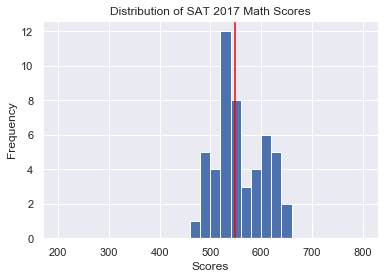

In [1043]:
# quick EDA for SAT 2017 Math scores
eda_hist(sat_17.Math, 200, 800)
plt.title('Distribution of SAT 2017 Math Scores');

In [1044]:
# find the outlier
sat_17[sat_17.Math == sat_17.Math.min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [1045]:
# find bottom 3 math scores
sat_17.sort_values(['Math'], ascending=False).tail(3)
# typo error for Maryland's Math scores, missing a 4 at the end

,State,Participation,Evidence-Based Reading and Writing,Math,Total
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
20,Maryland,69%,536,52,1060


Variance: 2044.5743944636679 
Std.Deviation: 45.21697020437866
Max Score: 644
Min Score: 482


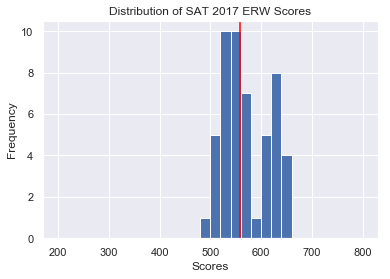

In [1046]:
eda_hist(sat_17['Evidence-Based Reading and Writing'], 200, 800)
plt.title('Distribution of SAT 2017 ERW Scores');

Variance: 8387.53940792003 
Std.Deviation: 91.58351056778743
Max Score: 1295
Min Score: 950


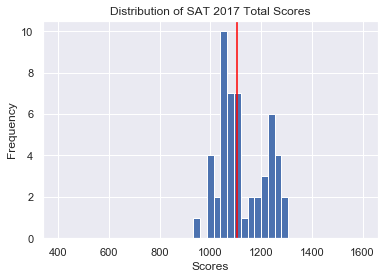

In [1047]:
eda_hist(sat_17.Total, 400, 1600, 45)
plt.title('Distribution of SAT 2017 Total Scores');

##### Explore ACT 2017 Scores

In [1048]:
# quick overview of ACT 2017 scores
act_17.iloc[:,2:].agg([np.var, np.std, np.mean, np.median, np.max, np.min])

,English,Math,Reading,Science,Composite
var,5.438839,3.855732,4.197055,9.929514,NaN
std,2.332132,1.963602,2.048672,3.151113,NaN
mean,20.919231,21.173077,22.001923,21.040385,NaN
median,20.550000,20.900000,21.700000,21.150000,NaN
amax,25.500000,25.300000,26.000000,24.900000,25.5
amin,16.300000,18.000000,18.100000,2.300000,17.8


Variance: 9.738561390532542 
Std.Deviation: 3.1206668182509554
Max Score: 24.9
Min Score: 2.3


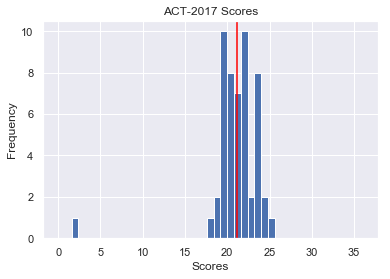

In [1049]:
# used function earlier to plot
eda_hist(act_17.Science, 0,36,45)
plt.title('ACT-2017 Scores');

In [1050]:
act_17[act_17.Science == act_17.Science.min()]
# probably a typo error again

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Variance: 3.78158284023669 
Std.Deviation: 1.9446292295028094
Max Score: 25.3
Min Score: 18.0


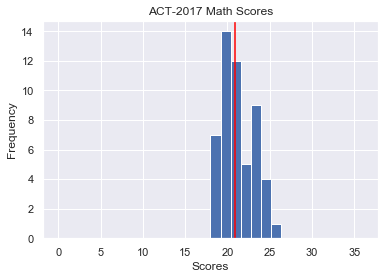

In [1051]:
# used function earlier to plot
eda_hist(act_17.Math, max_score = 36)
plt.title('ACT-2017 Math Scores');

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

- SAT 2017 - Maryland 'Math' Scores

- ACT 2017 - Maryland 'Science' Scores

- correct the State, Wyoming ['Composite'] score -> remove the 'x' from 20.2x

#### 5. What are your data types? 
Display the data types of each feature. 

In [1052]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [1053]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:**

- 'Participation' data type format to change to float as it is currently an object (str)
- SAT 2017 - [Maryland's 'Math' Scores](https://magoosh.com/hs/sat/sat-scores/2018/average-sat-scores-by-state-how-does-your-state-stack-up/)

- ACT 2017 - [Maryland's 'Science' Scores](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

- correct the State, Wyoming ['Composite'] score -> remove the 'x' from 20.2x
- to remove extra 'National' line item in act_2017 data could be deemed as redundant
- to shorten 'Evidence-Based Reading and Writing' column in sat_2017 to 'ERW' instead

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type.  
*(Use `map` or `apply` to change these columns in each dataframe)*

In [1054]:
# create copies of the original data set
sat_17_clean = sat_17.copy()
act_17_clean = act_17.copy()

In [1055]:
# SAT 2017
# convert ['Participation'] to type float (proportion)
sat_17_clean.Participation = sat_17_clean.Participation.str.replace('%', '').astype(float)

# confirm column in proper dtype
sat_17_clean.Participation.dtype

dtype('float64')

In [1056]:
# ACT 2017
# convert ['Participation'] to type *float* (as a proportion)
act_17_clean.Participation = act_17_clean.Participation.str.replace('%', '').astype(float)

# confirm column in proper dtype
act_17_clean.Participation.dtype

dtype('float64')

- Fix any individual values preventing other columns from being the appropriate type.

In [1057]:
# SAT 2017 
# correct Maryland's 'Math' Score -> 52 to 524
sat_17_clean.loc[sat_17_clean['State'] == 'Maryland', 'Math'] = 524

In [1058]:
# ACT 2017 
# correct Maryland's 'Science' Score -> 2.3 to 23.2
act_17_clean.loc[act_17_clean['State'] == 'Maryland', 'Science'] = 23.2

In [1059]:
# ACT 2017
# correct the State, Wyoming ['Composite'] score -> remove the 'x' from 20.2x
# alt. method: act_17_clean.at[51, 'Composite'] = '20.2'
act_17_clean.loc[act_17_clean['State'] == 'Wyoming', 'Composite'] = '20.2'

- Finish your data modifications by making sure the columns are now typed appropriately.

In [1060]:
# ACT 2017
# convert ['Composite'] to type *float*
# check all data in column has no errors
act_17_clean.Composite = act_17_clean.Composite.astype(float)
act_17_clean.Composite.dtype

dtype('float64')

In [1061]:
# check for errors
assert act_17_clean.Composite.dtype == float

In [1062]:
# convert Participation columns to proporiton
sat_17_clean.Participation = sat_17_clean.Participation/100
act_17_clean.Participation = act_17_clean.Participation/100

- Display the data types again to confirm they are correct.

In [1063]:
# ensure respective columns are floats
sat_17_clean['Participation'].dtype, act_17_clean.Composite.dtype, act_17_clean.Participation.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [1064]:
# preview data to check
act_17_clean.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,0.29,23.5,23.3,24.6,23.5,23.8
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5
51,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2


In [1065]:
# preview data to check
sat_17_clean.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference between the SAT columns and the ACT columns.  
Your solution should map all column names being changed at once (no repeated singular name-changes).  
**We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [1066]:
# preview columns
sat_17_clean.columns, act_17_clean.columns

(Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
        'Total'],
       dtype='object'),
 Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
        'Composite'],
       dtype='object'))

In [1067]:
# to shorten 'Evidence-Based Reading and Writing' column in sat_2017 to 'ERW' instead
sat_17_clean.columns = ['sat_17_state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math', 'sat_17_total']

# differentiate between SAT and ACT columns
act_17_clean.columns = ['act_17_state', 'act_17_participation', 'act_17_english', 'act_17_math', 'act_17_reading', 'act_17_science',
        'act_17_composite']

In [1068]:
# preview data columns to check
sat_17_clean.columns, act_17_clean.columns

(Index(['sat_17_state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
        'sat_17_total'],
       dtype='object'),
 Index(['act_17_state', 'act_17_participation', 'act_17_english', 'act_17_math',
        'act_17_reading', 'act_17_science', 'act_17_composite'],
       dtype='object'))

In [1069]:
sat_17_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
sat_17_state            51 non-null object
sat_17_participation    51 non-null float64
sat_17_erw              51 non-null int64
sat_17_math             51 non-null int64
sat_17_total            51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [1070]:
sat_17_clean.sat_17_participation.head()

0    0.05
1    0.38
2    0.30
3    0.03
4    0.53
Name: sat_17_participation, dtype: float64

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|*Column Name*|*int/float/object*|*ACT/SAT*|*Description of each column*| 
|sat_17_state|*object*|SAT|The name of each of the 51 states in USA|
|sat_17_participation|*float*|SAT|The proportion of students tested *(0.5 represents 50% of students in state)*|
|sat_17_erw|*int*|SAT|Avg. SAT Subtest (Evidence-Based Reading and Writing) score for each state *(max. of 800 and min. of 200)*|
|sat_17_math|*int*|SAT|Avg. SAT Subtest (Math) score for each state *(max. of 800 and min. of 200)*|
|sat_17_total|*int*|SAT|Avg. Total SAT Test score for each state *(max. of 1600 and min. of 400)*|
|act_17_state|*object*|ACT|The name of each of the 51 states in USA|
|act_17_participation|*float*|ACT|The proportion of students tested *(0.5 represents 50% of students in state)*|
|act_17_english|*float*|ACT|Avg. ACT English score for each state *(max. of 36 and min. of 1)* |
|act_17_math|*float*|ACT|Avg. ACT Math score for each state *(max. of 36 and min. of 1)*|
|act_17_reading|*float*|ACT|Avg. ACT Reading score for each state *(max. of 36 and min. of 1)*|
|act_17_science|*float*|ACT|Avg. ACT Science score for each state *(max. of 36 and min. of 1)*|
|act_17composite|*float*|ACT|Avg. ACT Composite score max. for each state *(max. of 36 and min. of 1)*|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [1071]:
# get rid of the 'National' row in ACT_2017, we can always aggregate the 51 states
act_17_clean.drop([0], inplace=True)
# reset indexes
act_17_clean.reset_index(drop=True, inplace=True)

In [1072]:
# check
act_17_clean.head(3)

,act_17_state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [1073]:
# merge sat_17_clean and act_17_clean DataFrames on their State columns
combined_17 = pd.merge(sat_17_clean, act_17_clean, left_on='sat_17_state', right_on='act_17_state', how='outer')

In [1074]:
# rename 'sat_17_state' to 'state'
combined_17.rename(columns={'sat_17_state' : 'state'}, inplace=True)
# drop duplicated state name from ACT dataset
combined_17.drop(columns=['act_17_state'],inplace=True)
combined_17.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [1075]:
combined_17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above.   
**Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [1076]:
# will have to manually create new columns for the missing data for act_2018.csv 
# there is also a duplicate row, Maine in act_2018.csv 

#### *References*  -
**a) Magoosh:**   
[1st ACT 2018 Dataset](https://magoosh.com/hs/act/2016/average-act-score-by-state/)  
**b) ACT:**  
[2nd ACT 2018 Datset](https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf)

Manually collected data from the above links, and saved the data into *'act_2018_edited.csv'* of this project folder

#### Import 2018 Data

In [1077]:
sat_18 = pd.read_csv('../data/sat_2018.csv')
act_18 = pd.read_csv('../data/act_2018_edited.csv')

In [1078]:
# create copies of the original data set
sat_18_clean = sat_18.copy()
act_18_clean = act_18.copy()

In [1079]:
# check
sat_18_clean.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [1080]:
act_18_clean.head()

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


#### Fix Incorrect Data Types for 2018

In [1081]:
# preview datatypes and row index
sat_18_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [1082]:
# remove '%' from str and change dtype to float
sat_18_clean['Participation'] = sat_18_clean.Participation.str.replace('%','').astype(float)
# convert Participation column to proportion 
sat_18_clean['Participation']  = sat_18_clean.Participation / 100

In [1083]:
# check
sat_18_clean.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [1084]:
# preview datatypes and row index
act_18_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null float64
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### Rename 2018 columns

In [1085]:
# to shorten 'Evidence-Based Reading and Writing' column in sat_2017 to 'ERW' instead
sat_18_clean.columns = ['sat_18_state', 'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total']

# differentiate between SAT and ACT columns
act_18_clean.columns = ['act_18_state', 'act_18_participation', 'act_18_english', 'act_18_math', 'act_18_reading', 'act_18_science',
        'act_18_composite']

In [1086]:
# check
sat_18_clean.head()

,sat_18_state,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [1087]:
act_18_clean.head()

,act_18_state,act_18_participation,act_18_english,act_18_math,act_18_reading,act_18_science,act_18_composite
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


In [1088]:
# merge sat_18_clean and act_18_clean DataFrames on their State columns
combined_18 = pd.merge(sat_18_clean, act_18_clean, left_on='sat_18_state', right_on='act_18_state', how='outer')

In [1089]:
# rename 'sat_18_state' to 'state'
combined_18.rename(columns={'sat_18_state' : 'state'}, inplace=True)

# drop duplicated state name from ACT dataset
combined_18.drop(columns=['act_18_state'],inplace=True)

In [1090]:
# check
combined_18.head(3)

,state,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,act_18_participation,act_18_english,act_18_math,act_18_reading,act_18_science,act_18_composite
0,Alabama,0.06,595,571,1166,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.43,562,544,1106,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.29,577,572,1149,0.66,18.2,19.4,19.5,19.2,19.2


In [1091]:
# save out date as combined_2018.csv
combined_18.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe

Saved the contents of this merged dataframe as `final.csv`.

In [1092]:
# merge 2017 and 2018 dataset
final = pd.merge(combined_17, combined_18, on='state', how='outer')

In [1093]:
# save out combined final data to final.csv
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [1094]:
final.describe()

,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,act_18_participation,act_18_english,act_18_math,act_18_reading,act_18_science,act_18_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,20.988235,21.125490,22.015686,21.345098,21.486275
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.446356,2.035765,2.167245,1.870114,2.106278
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [1095]:
# create standard devation function
def std_dev(series):
    sum_n = 0
    for x in series: 
         # every iteration subtracts the mean value of a list [sum(data)/len(data)]...
         # from every [x] element of a list and then raises to the second power [**2]   
        sum_n += ((x - sum(series)/len(series))**2) 
    return (sum_n/(len(series)-1))**.5 

In [1096]:
# compare custom function with numpy's fucntion
std_dev(final.sat_17_erw), np.std(final.sat_17_erw)

(45.66690138768932, 45.21697020437866)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 

In [1097]:
# filter for header and rows
header = list(final.columns)[1:]
rows = [std_dev(final[x]) for x in header]

# use dictionary comprehension to apply std_dev function to each numeric column in dataframe
sd = {k:v for k,v in zip(header, rows)}
sd

{'sat_17_participation': 0.35276632270013036,
 'sat_17_erw': 45.66690138768932,
 'sat_17_math': 47.12139516560329,
 'sat_17_total': 92.49481172519046,
 'act_17_participation': 0.32140842015886834,
 'act_17_english': 2.35367713980303,
 'act_17_math': 1.9819894936505533,
 'act_17_reading': 2.0672706264873146,
 'act_17_science': 1.7393530462812443,
 'act_17_composite': 2.020694891154341,
 'sat_18_participation': 0.37314256330391965,
 'sat_18_erw': 47.50262737831599,
 'sat_18_math': 47.77262322095955,
 'sat_18_total': 94.15508275097599,
 'act_18_participation': 0.3408097623567245,
 'act_18_english': 2.4463562339793055,
 'act_18_math': 2.035764538177723,
 'act_18_reading': 2.1672445684804105,
 'act_18_science': 1.8701137639716146,
 'act_18_composite': 2.1062781969951776}

Do your manually calculated standard deviations match up with the output from pandas `describe`?   
What about numpy's `std` method?

**Answer:**  
Yes, it matches only if *n-1* is used  
Numpy's std method uses divides only by *n*

### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

**- Which states have the highest and lowest participation rates for the:**
    - 2017 SAT
    Highest: Connecticut, Delaware, District of Columbia, Michigan
    Lowest: Iowa, Mississippi, North Dakota
    
    - 2018 SAT 
    Highest: Idaho, Michigan, Delaware, Connecticut, Colorado        
    Lowest: North Dakota
    
    - 2017 ACT
    Highest: Wyoming, Oklahoma, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Wisconsin, 
    Montana, Nevada, North Carolina, Missouri, Alabama, Tennessee, Utah, South Carolina
    Lowest: Maine
    
    - 2018 ACT
    Highest: Wyoming, Oklahoma, Arkansas, Kentucky, Louisiana, Mississippi, Wisconsin, Montana, Nebraska, Nevada,
    North Carolina, Ohio, Missouri, Alabama, South Carolina, Tennessee, Utah        
    Lowest: Maine
    
**- Do any states with 100% participation on a given test have a rate change year-to-year?**  
**- Do any states show have more than 50% participation on *both* tests either year?**

Based on what you've just observed, have you identified any states that you're especially interested in?   
*Make a note of these and state why you think they're interesting*.

You should **comment on your findings at each step** in a markdown cell below your code block. Make sure you include at least one example of: 
- sorting your dataframe by a column
- one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [1098]:
# set state as index
final.set_index('state', inplace=True)

In [1099]:
final.head(3)

,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,act_18_participation,act_18_english,act_18_math,act_18_reading,act_18_science,act_18_composite
state,,,,,,,,,,,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,18.9,18.3,19.6,19.0,19.1
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,19.8,20.6,21.6,20.7,20.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,18.2,19.4,19.5,19.2,19.2


**- Which states have the highest and lowest participation rates for SAT & ACT tests (2017 & 2018)**

In [1100]:
# create a function for finding out States with highest and lowest rates for each test score
def high_lows(series):
    # filter for states with top and bot scores
    top, bot  = series.sort_values(ascending=False).head(15), series.sort_values(ascending=False).tail()
    
    # convert to DataFrame & concat
    top_df, bot_df = pd.DataFrame(data=top), pd.DataFrame(data=bot)
    df = pd.concat([top_df, bot_df], join="outer")
    
    return df

In [1101]:
# display top and bottom States' participation rates for SAT
print(high_lows(final['sat_17_participation']))
print(high_lows(final['sat_18_participation']))

                      sat_17_participation
state                                     
Connecticut                           1.00
Delaware                              1.00
District of Columbia                  1.00
Michigan                              1.00
New Hampshire                         0.96
Maine                                 0.95
Idaho                                 0.93
Florida                               0.83
Massachusetts                         0.76
Rhode Island                          0.71
New Jersey                            0.70
Maryland                              0.69
New York                              0.67
Pennsylvania                          0.65
Virginia                              0.65
Utah                                  0.03
Missouri                              0.03
Iowa                                  0.02
Mississippi                           0.02
North Dakota                          0.02
                      sat_18_participation
state      

In [1102]:
# display top and bottom States' participation rates for ACT 
print(high_lows(final['act_17_participation']))
print(high_lows(final['act_18_participation']))

                act_17_participation
state                               
Wyoming                         1.00
Oklahoma                        1.00
Arkansas                        1.00
Colorado                        1.00
Kentucky                        1.00
Louisiana                       1.00
Minnesota                       1.00
Mississippi                     1.00
Wisconsin                       1.00
Montana                         1.00
Nevada                          1.00
North Carolina                  1.00
Missouri                        1.00
Alabama                         1.00
Tennessee                       1.00
Pennsylvania                    0.23
Rhode Island                    0.21
Delaware                        0.18
New Hampshire                   0.18
Maine                           0.08
                act_18_participation
state                               
Wyoming                         1.00
Oklahoma                        1.00
Arkansas                        1.00
K

It seems based on the above observations that the ACT test is more popular throughout the US with States achieving 100% rates staying constant  
while States that achieve 100% participation rate for the SAT test varies. 

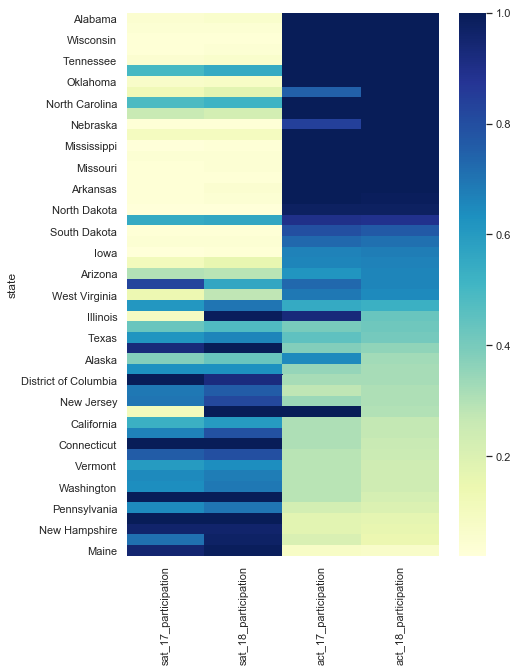

In [1103]:
# confirm the above observations with heat map 
plt.figure(figsize=(7,10))
sns.heatmap(final[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']].sort_values(by='act_18_participation', ascending=False), cmap='YlGnBu');

**- Do any states with 100% participation on a given test have a rate change year-to-year?**  

In [1104]:
# check for states with 100% participation for SAT 2017 & 2018
sat_100 = final[(final.sat_17_participation == 1) | (final.sat_18_participation == 1)]
sat_particpation_df = sat_100[['sat_17_participation', 'sat_18_participation']]

In [1105]:
# create a rate of change column
sat_particpation_df['rate_of_change'] = round(((sat_particpation_df['sat_18_participation'] -  sat_particpation_df['sat_17_participation'])/ sat_particpation_df['sat_17_participation']), 2)

/Users/jeromechua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [1106]:
# check for states with 100% participation for ACT 2017 and see if there is any change in 2018, vice-versa
act_100 = final[(final.act_17_participation == 1) | (final.act_18_participation == 1)]
act_particpation_df = act_100[['act_17_participation', 'act_18_participation']]

In [1107]:
# create a rate of change column 
act_particpation_df['rate_of_change'] = round(((act_particpation_df['act_18_participation'] -  act_particpation_df['act_17_participation'])/ act_particpation_df['act_17_participation']), 2)

/Users/jeromechua/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [1108]:
# filter for states with rate of change over 2017 & 2018
sat_particpation_df[sat_particpation_df['rate_of_change'] != 0]

,sat_17_participation,sat_18_participation,rate_of_change
state,,,
Colorado,0.11,1.00,8.09
District of Columbia,1.00,0.92,-0.08
Idaho,0.93,1.00,0.08


In [1109]:
# filter for states with rate of change over 2017 & 2018
act_particpation_df[act_particpation_df['rate_of_change'] !=0]

,act_17_participation,act_18_participation,rate_of_change
state,,,
Colorado,1.00,0.30,-0.70
Minnesota,1.00,0.99,-0.01
Nebraska,0.84,1.00,0.19
Ohio,0.75,1.00,0.33


*Answer:*  
- SAT: There were changes for District of Columbia, Colorado, and Idaho from year 2017 to 2018 and vice-versa  
- ACT: There were changes for Colorado, Minnesota, Nebraska, and Ohio from year 2017 to 2018 and vice-versa

**- Do any states show have more than 50% participation on *both* tests either year?**

In [1110]:
# filter for states that have more than 50% particpation rate for SAT & ACT tests in 2017
fifty_2017 = final[(final.sat_17_participation >= 0.5) & (final.act_17_participation >= 0.5)]
fifty_2017[['sat_17_participation', 'act_17_participation']]

,sat_17_participation,act_17_participation
state,,
Florida,0.83,0.73
Georgia,0.61,0.55
Hawaii,0.55,0.90
South Carolina,0.50,1.00


In [1111]:
# filter for states that have more than 50% particpation rate for SAT & ACT tests in 2018
fifty_2018  = final[(final.sat_18_participation <= 0.5) & (final.act_18_participation <= 0.5)]
fifty_2018[['sat_18_participation', 'act_18_participation']]

,sat_18_participation,act_18_participation
state,,
Alaska,0.43,0.33
Oregon,0.48,0.42


*Answer:*  
- 2017: Yes, Florida, Georgia, Hawaiii & South Carolina had more than 50% participation rates for both tests  
- 2018: Yes, Alaska & Oregon had more than 50% participation rates for both tests  

**- Which states have the highest and lowest mean total/composite scores for the:**
    - 2017 SAT
    Highest: Minnesota     
    Lowest: District of Columbia 
    - 2018 SAT
     Highest: Minnesota     
    Lowest: District of Columbia 
    - 2017 ACT
     Highest: New Hampshire     
    Lowest: Nevada
    - 2018 ACT
     Highest: Connecticut     
    Lowest: Nevada 

In [1112]:
# states with the highest & lowest total score for SAT test in 2017
print(high_lows(final['sat_17_total']))

# states with the highest & lowest total score for SAT test in 2018
print(high_lows(final['sat_18_total']))

                      sat_17_total
state                             
Minnesota                     1295
Wisconsin                     1291
Iowa                          1275
Missouri                      1271
Kansas                        1260
North Dakota                  1256
Nebraska                      1253
Kentucky                      1247
Mississippi                   1242
Utah                          1238
Wyoming                       1230
Tennessee                     1228
South Dakota                  1216
Arkansas                      1208
Colorado                      1201
Maine                         1012
Michigan                      1005
Idaho                         1005
Delaware                       996
District of Columbia           950
                      sat_18_total
state                             
Minnesota                     1298
Wisconsin                     1294
North Dakota                  1283
Iowa                          1265
Kansas              

In [1113]:
# states with the highest & lowest composite score for ACT test in 2017
print(high_lows(final['act_17_composite']))

# states with the highest & lowest composite score for ACT test in 2018
print(high_lows(final['act_18_composite']))

                      act_17_composite
state                                 
New Hampshire                     25.5
Massachusetts                     25.4
Connecticut                       25.2
Maine                             24.3
District of Columbia              24.2
New York                          24.2
Michigan                          24.1
Delaware                          24.1
Rhode Island                      24.0
New Jersey                        23.9
Virginia                          23.8
Pennsylvania                      23.7
Maryland                          23.6
Vermont                           23.6
California                        22.8
North Carolina                    19.1
Hawaii                            19.0
South Carolina                    18.7
Mississippi                       18.6
Nevada                            17.8
                      act_18_composite
state                                 
Connecticut                       25.6
Massachusetts            

We can see that for SAT total tests scores in both year 2017 & 2018, there was no change to the States that achieved highest and lowest scores.  
For ACT composite test scores there were changes in both the States that acheived the highest and lowest scores.

## Visualize the data (Explanatory Visualisation)

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options  
(Axis labels aren't really necessary, as long as the title is informative).

In [1114]:
final.head()

,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,act_18_participation,act_18_english,act_18_math,act_18_reading,act_18_science,act_18_composite
state,,,,,,,,,,,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,18.9,18.3,19.6,19.0,19.1
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,19.8,20.6,21.6,20.7,20.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,18.2,19.4,19.5,19.2,19.2
Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.1,18.9,19.7,19.4,19.4
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.5,22.5,23.0,22.1,22.7


In [1115]:
# list columns
final.columns
cols = ['sat_17_participation', 'sat_17_erw', 'sat_17_math', 'sat_17_total',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total',
        'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_composite',
       'act_18_participation', 'act_18_english', 'act_18_math',
       'act_18_reading', 'act_18_science', 'act_18_composite']

In [1116]:
# reorder columns
final = final[cols]

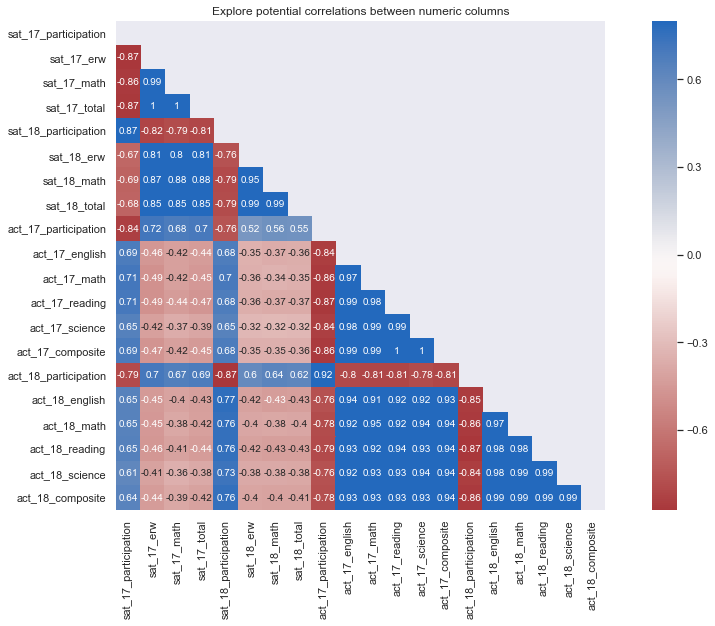

In [1117]:
# Refer to 2.04_python-pandas-plots-starter-code for nicer plotting

plt.figure(figsize=(17,9))
corr = final.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white
sns.heatmap(corr, mask = mask, vmax=.8, square=True, annot=True, cmap='vlag_r')
plt.title('Explore potential correlations between numeric columns');

There is a negative correlation between SAT participation and ACT participation rates.
There is also a negative relationship between participation rates and total/composite scores on both tests.

#### Define a custom function to subplot histograms

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

In [1118]:
# create histogram function
def subplot_histograms(dataframe, list_of_columns, list_of_titles, xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,10)) 
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel() 
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column])
        ax[i].axvline(dataframe[column].median(), c='red')
        
    # plot titles and xlabels    
    for i, ax in enumerate(ax):
        ax.set_title('{}'.format(list_of_titles[i]))
        ax.set_xlabel(xlabels)
        ax.set_ylabel('Frequency')

    # adjust spacings between axes
    plt.subplots_adjust(wspace=.25, hspace=.25)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [1119]:
# create subsets/filters
participation = ['sat_17_participation','sat_18_participation','act_17_participation','act_18_participation']
math = ['sat_17_math','sat_18_math','act_17_math','act_18_math']
read_verbal = ['sat_17_erw','sat_18_erw','act_17_reading','act_18_reading']

# create title lists
participation_titles = ['SAT 17 Part. Rate','SAT 18 Part. Rate','ACT 17 Part. Rate','ACT 18 Part. Rate']
math_titles = ['SAT 17 Math','SAT 18 Math','ACT 17 Math','ACT 18 Math']
read_verbal_titles = ['SAT 17 ERW','SAT 18 ERW','ACT 17 Reading','ACT 18 Reading']

# create xlabels
participation_xlabels = 'Proportion'
math_xlabels = 'Math Scores'
read_verbal_xlabels = 'Reading/Verbal Scores'

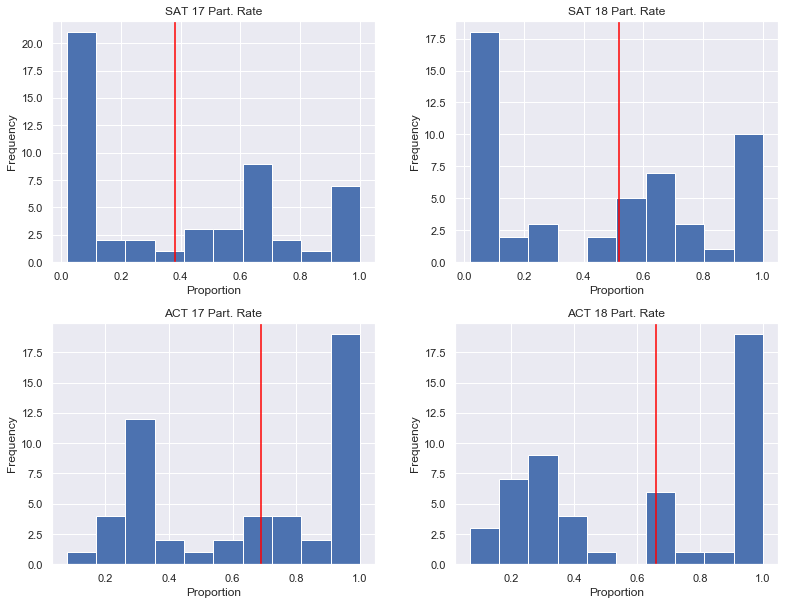

In [1120]:
subplot_histograms(final, participation, participation_titles, participation_xlabels);

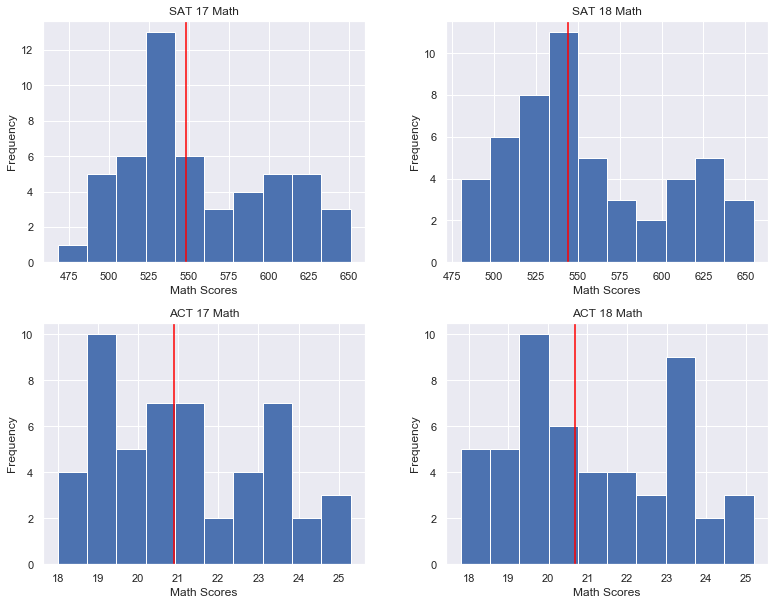

In [1121]:
subplot_histograms(final, math, math_titles, math_xlabels);

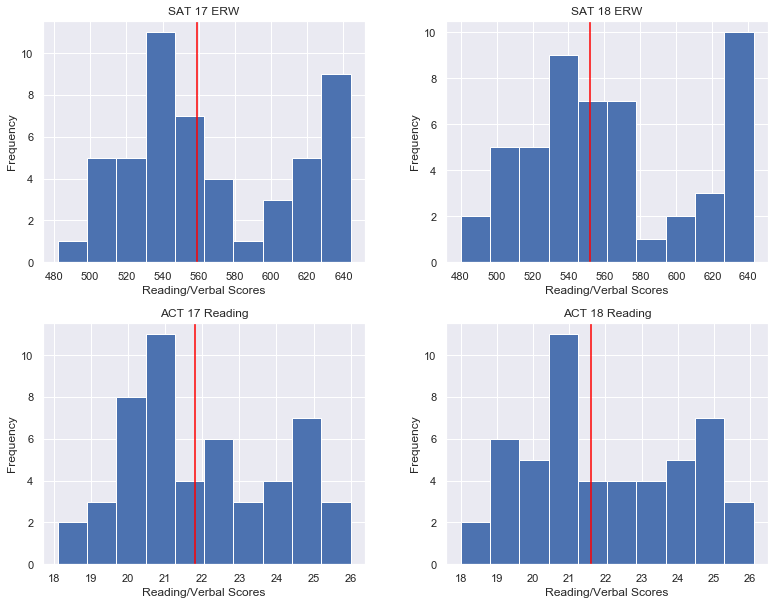

In [1122]:
subplot_histograms(final, read_verbal, read_verbal_titles, read_verbal_xlabels);

For all of the above histograms, the mean was mostly not in the center indicating possible skews in data. One, due to outliers or majority performing badly, or two, that the data was not being sampled from a normal distribution, and hence, might not reflect the true population mean.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Your plots should show:
- 2 clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

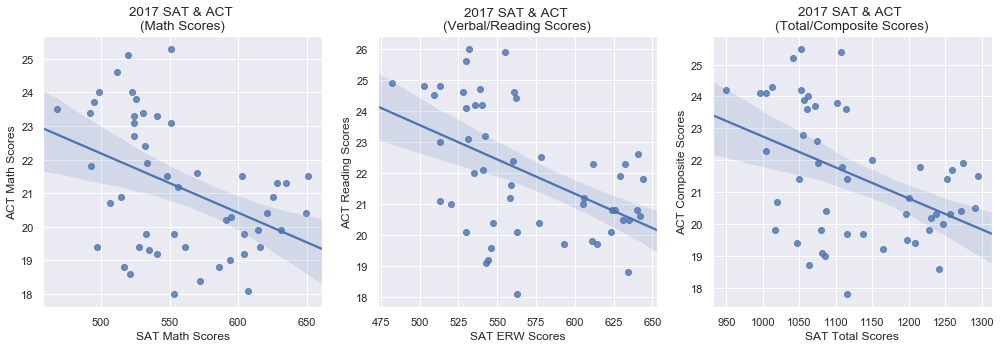

In [1123]:
# plot the Figure object
fig = plt.figure(figsize=(17,5))

# add the Axes 1 object to the Figure (2017 Math)
ax1 = fig.add_subplot(1,3,1)
sns.regplot(data=final, x='sat_17_math', y='act_17_math')

# plot titles and labels
plt.xlabel('SAT Math Scores')
plt.ylabel('ACT Math Scores')
plt.title("2017 SAT & ACT \n(Math Scores)", fontsize=13.5)

# add the Axes 2 object to the Figure (2017 Reading/Verbal)
ax2 = fig.add_subplot(1,3,2)
sns.regplot(data=final, x='sat_17_erw', y='act_17_reading')
plt.title("YOY ACT Composite Scores\n2017-2018")

# plot titles and labels
plt.xlabel('SAT ERW Scores')
plt.ylabel('ACT Reading Scores')
plt.title("2017 SAT & ACT \n(Verbal/Reading Scores)", fontsize=13.5);

# add the Axes 3 object to the Figure (2017 Total/Composite Scores)
ax3 = fig.add_subplot(1,3,3)
sns.regplot(data=final, x='sat_17_total', y='act_17_composite')
plt.title("YOY ACT Composite Scores\n2017-2018")

# plot titles and labels
plt.xlabel('SAT Total Scores')
plt.ylabel('ACT Composite Scores')
plt.title("2017 SAT & ACT \n(Total/Composite Scores)", fontsize=13.5);

We observe a negative correlation *(as the value of one variable increases, the other decreases)* between ACT & SAT scores. This would be obvious as they are on different scales


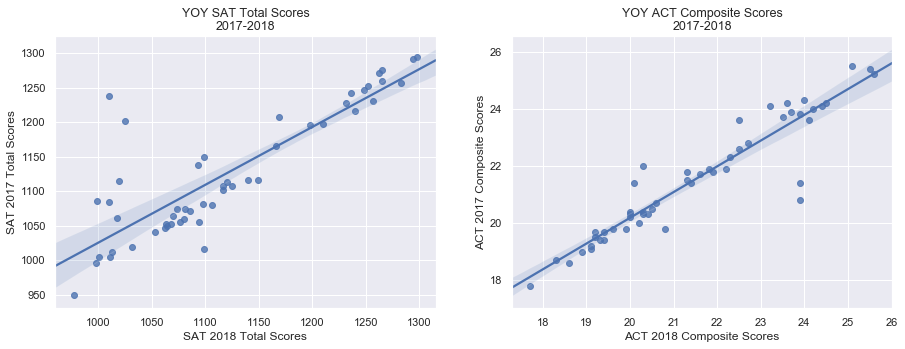

In [1124]:
# plot the Figure object for SAT & ACT Total/Composite scores
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure (SAT)
ax1 = fig.add_subplot(1,2,1)
sns.regplot(data=final, x='sat_18_total', y='sat_17_total')

# plot titles and labels
plt.xlabel('SAT 2018 Total Scores')
plt.ylabel('SAT 2017 Total Scores')
plt.title("YOY SAT Total Scores\n2017-2018", fontsize=12.5)

# add the Axes 2 object to the Figure (ACT)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(data=final, x='act_18_composite', y='act_17_composite')
plt.title("YOY ACT Composite Scores\n2017-2018")

# plot titles and labels
plt.xlabel('ACT 2018 Composite Scores')
plt.ylabel('ACT 2017 Composite Scores')
plt.title("YOY ACT Composite Scores\n2017-2018", fontsize=12.5);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [1125]:
# make a copy of original dataframe
df = final.copy()
df.reset_index(inplace=True)

In [1126]:
# filter copied dataframe
participation_df = df[['state','sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']]

# rename columns
participation_df.columns = ['state', "SAT '17'", "SAT '18", "ACT '17", "ACT '18"]

# unpivot participation_df for plotting in later stage
participation_df = pd.melt(participation_df, id_vars='state')

# create column to be able to differentiate by test type
participation_df['test_type'] = 'SAT'
participation_df.iloc[102:, -1] = 'ACT'

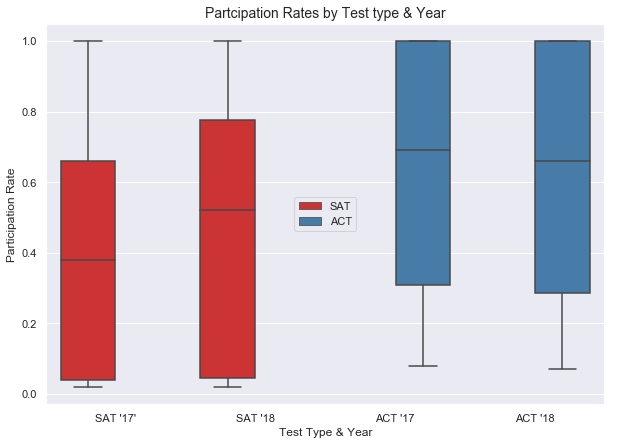

In [1127]:
plt.figure(figsize=(10,7))

sns.boxplot(data=participation_df, x='variable', y='value', hue="test_type", palette="Set1")
plt.title('Partcipation Rates by Test type & Year', fontsize=14)
plt.ylabel('Participation Rate')
plt.xlabel('Test Type & Year')
plt.legend(loc='center');

### Exploring Trends between SAT & ACT Total/Composite scores

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [ ]:
round(final.agg([np.mean, np.median, np.std, np.var, np.min, np.max]), 2)

**Answer:**


|Column Name|Description|
|---|---|
|sat_17_participation|Negatively skewed as seen in the mean being lower than the median|
|sat_17_erw|Distribution is non-symmetric, & bidmodal seen in the two peaks of data|
|sat_17_math|Distribution is evenly spread with mean & median being very close|
|sat_17_total|Distribution is non-symmetric, & slightly bidmodal|
|act_17_participation|Distribution is unimodal with many states having 100% part. rate|
|act_17_english|Evenly spread, pretty normally distrubted, mean & median are almost equal|
|act_17_math|Distribution is positively skewed, especially when compared to the other subtests|
|act_17_reading|Evenly distributed, having its mean in the centre|
|act_17_science|Shape of distribution is symmetrical, with two peaks|
|act_17_composite|Rather evenly distributed, having its mean close in the centre|


#### We are generally assuming that data we sample from a population will be normally distributed.       Do we observe this trend?

**Answer:** 

$$ H_0: \text{The data follows a normal distribution} $$
$$ H_A: \text{The data does not follow a normal distribution} $$


$$ \text{If p <= 𝛼, reject } H_0 $$
$$ \text{If p > 𝛼, fail to reject } H_0$$

$$ \text{𝛼 = 0.05} $$

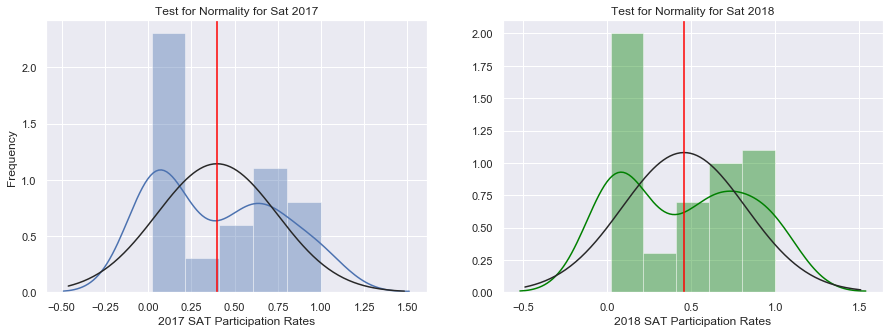

In [1153]:
# plot the Figure object
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure
ax1 = fig.add_subplot(1,2,1)
sns.distplot(final['sat_17_participation'],bins=5, fit=norm)
ax1.axvline(final['sat_17_participation'].mean(), c='red')

# plot titles and labels
plt.xlabel('2017 SAT Participation Rates')
plt.ylabel('Frequency')
plt.title('Test for Normality for Sat 2017');

# add the Axes 2 object to the Figure
ax2 = fig.add_subplot(1,2,2)
sns.distplot(final['sat_18_participation'],bins=5, fit=norm, color='green')
ax2.axvline(final['sat_18_participation'].mean(), c='red')

# plot titles and labels
plt.xlabel('2018 SAT Participation Rates')
plt.title('Test for Normality for Sat 2018');

Based on the above plots of the participation rates across the 51 states, we can see that the population of the data from which we sampled is not normally distributed.

In [1165]:
# test for normality
d, p_val = stats.kstest(final['sat_17_participation'], 'norm')
print('Test statistic:', d)
print('p-value: ', p_val)

Test statistic: 0.5079783137169019
p-value:  1.0082794525495568e-12


Since the **p value < α**, we can reject the null hypothesis that the sample data is normally distributed.   

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:**  

Because the data from which we sample does not follow a normal distribution we know that the 
mean would not be an accurate indicator of the spread of data. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 
**Does it make sense to conduct statistical inference given these data specifically?** 

Why or why not?  
*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:**  
No it would not as the data is aggregated into 51 data points. Not allowing for us to do random sampling and do statistical testing in a way that is meaningful. 
If we were to have all the data points that contributed to the overall State score would make more sense to conduct statistical inference.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

**Answer:**

Yes, and no.   
Yes, because of readily available score [conversion tables](https://collegereadiness.collegeboard.org/pdf/guide-2018-act-sat-concordance.pdf). Another argument would be it depends on you are comparing them, as will be demonstrated below.  
No, because just like the rest of the data, the math scores are aggregated as well.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
x, y = ecdf(final['act_18_participation'])

In [ ]:
plt.figure(figsize=(8,7))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Participation Rates")
plt.ylabel("Cumulative Distribution Function")

In [ ]:
# bootstrap & generate 1,000 'participation rates' that follow a normal distribution 
# using the mean and the standard deviation of our dataset
samples = np.random.normal(np.mean(final['act_18_participation']), np.std(final['act_18_participation']), size= 1000)

In [ ]:
x_theor, y_theor = ecdf(samples)
plt.plot(x_theor, y_theor)
plt.legend(('Normal Distribution', 'Empirical Data'), loc='lower right');

## Outside Research

- Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates.   
- Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**.     

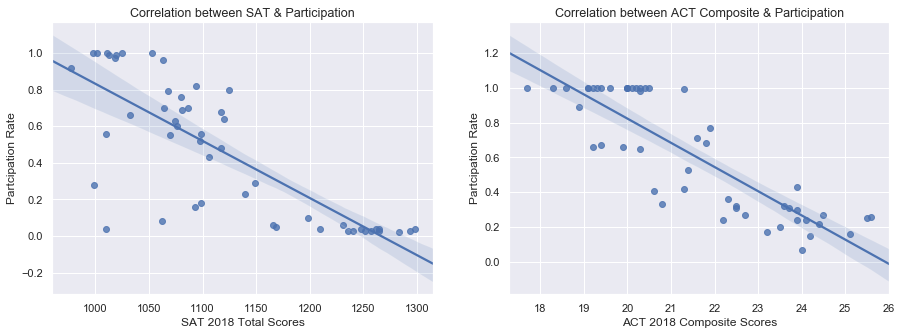

In [1152]:
# plot the Figure object for SAT & ACT Total/Composite scores
fig = plt.figure(figsize=(15,5))

# add the Axes 1 object to the Figure (SAT)
ax1 = fig.add_subplot(1,2,1)
sns.regplot(data=final, x='sat_18_total', y='sat_18_participation')

# plot titles and labels
plt.xlabel('SAT 2018 Total Scores')
plt.ylabel('Partcipation Rate')
plt.title("Correlation between SAT Total & Participation", fontsize=12.5)

# add the Axes 2 object to the Figure (ACT)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(data=final, x='act_18_composite', y='act_18_participation')

# plot titles and labels
plt.xlabel('ACT 2018 Composite Scores')
plt.ylabel('Partcipation Rate')
plt.title("Correlation between ACT Composite & Participation", fontsize=12.5);

There is a negative correlation between overall total/composite scores with participation rate. We can speculate that this is so because most of them taking the tests are juniors. However, we would need to gather the demographics from another dataset.

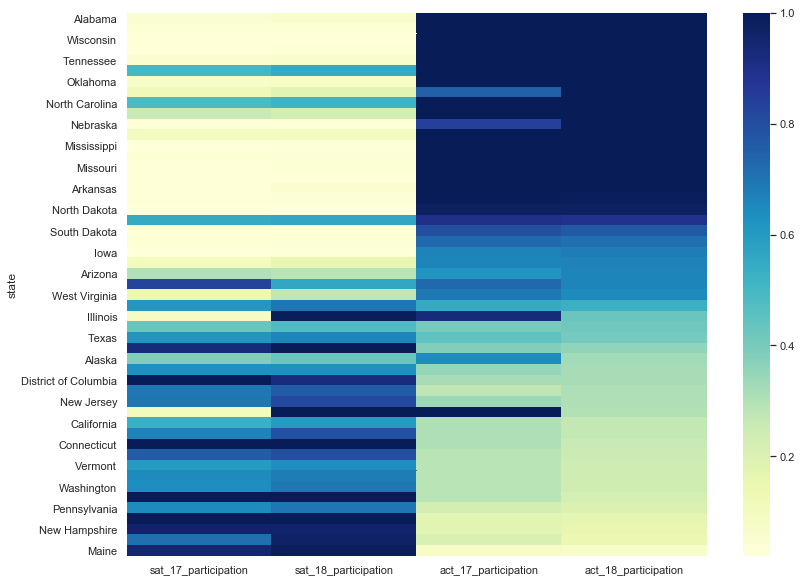

In [1150]:
# SAT and ACT participation trends
plt.figure(figsize=(13,10))
sns.heatmap(final[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']].sort_values(by='act_18_participation', ascending=False), cmap='YlGnBu');

## Conclusions

- Based on the findings found in the 2017 & 2018 data, and after some analysis, it is amazing to see how the news confirms the data findings, i.e. that there is indeed a negative relationship between performance & participation.


- It would have been useful to find other data sources to do more complex analysis, such as demographics data and how that can affect over all State test scores.


- I initially tried to compile percentile data so to uniformalise the scores between SAT & ACT, however, there was not enough time to be able to conduct this investigation.


## References

- [1st ACT 2018 Dataset](https://magoosh.com/hs/act/2016/average-act-score-by-state/)
- [2nd ACT 2018 Datset](https://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf)
- [SAT to ACT Conversion Table](https://collegereadiness.collegeboard.org/pdf/guide-2018-act-sat-concordance.pdf)
- [ACT & SAT Scores and Percentiles](https://blog.prepscholar.com/sat-math-vs-act-math-whats-the-difference)